# **Import necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output as cls
# import gradio as gr

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=6e18645787f80ccc5b501cd9dad15692eee7bd5fa148e858099c40f8b9ca88e1
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
batch_Size = 32
image_Size = 196
epochs = 5
channels = 3

# **Data spliting**

In [ ]:
data_dir = "/content/gdrive/MyDrive/fire_dataset"

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_Size , image_Size ),
  batch_size=batch_Size)

Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 196, 196, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
labels = train_ds.class_names
labels

['fire_images', 'non_fire_images']

# **Data Visualization**

In [ ]:
plt.figure(figsize=(20,10))
for imgBatch, labelBatch in train_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i+1)
        plt.imshow(imgBatch[i].numpy().astype('uint8'))
        plt.title(labels[labelBatch[i]])
        plt.axis("off")
        cls()

Output hidden; open in https://colab.research.google.com to view.

# **Scaling and Modelling**

In [ ]:
scaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(196, 196),
    layers.experimental.preprocessing.Rescaling(1./255.)
])

In [ ]:
model = Sequential([
    scaling,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=(batch_Size, image_Size, image_Size, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])



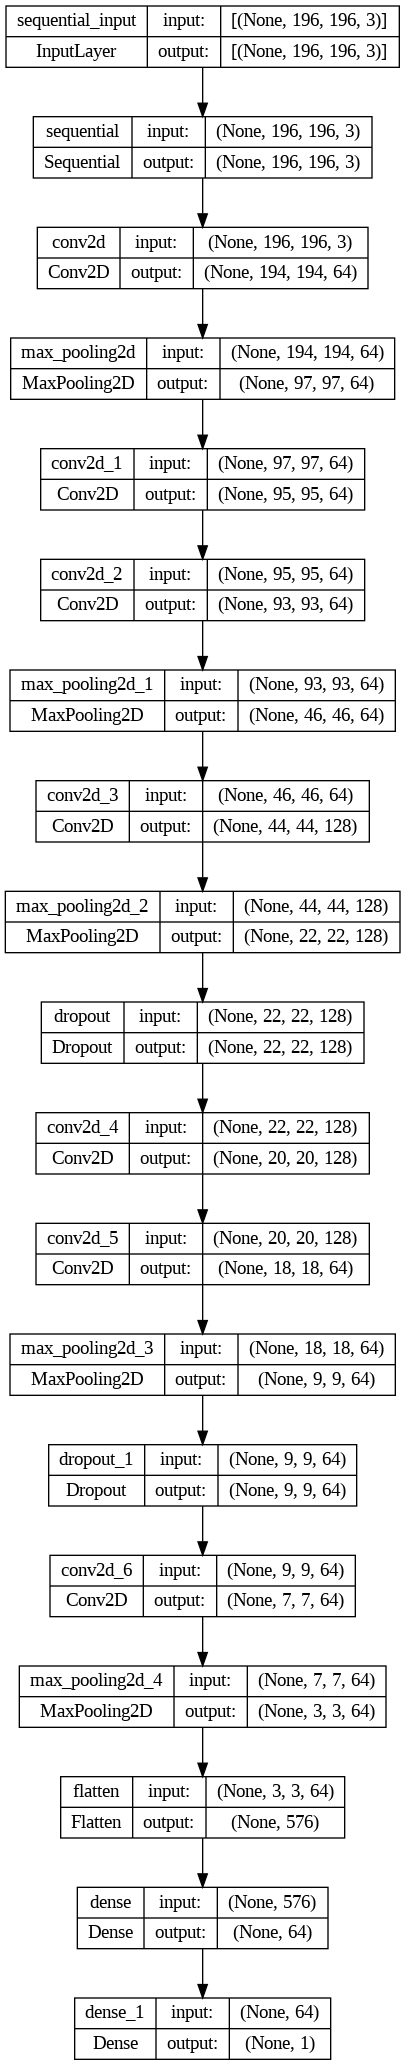

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='model.png')

# Display the architecture image
from IPython.display import Image
Image('model.png')

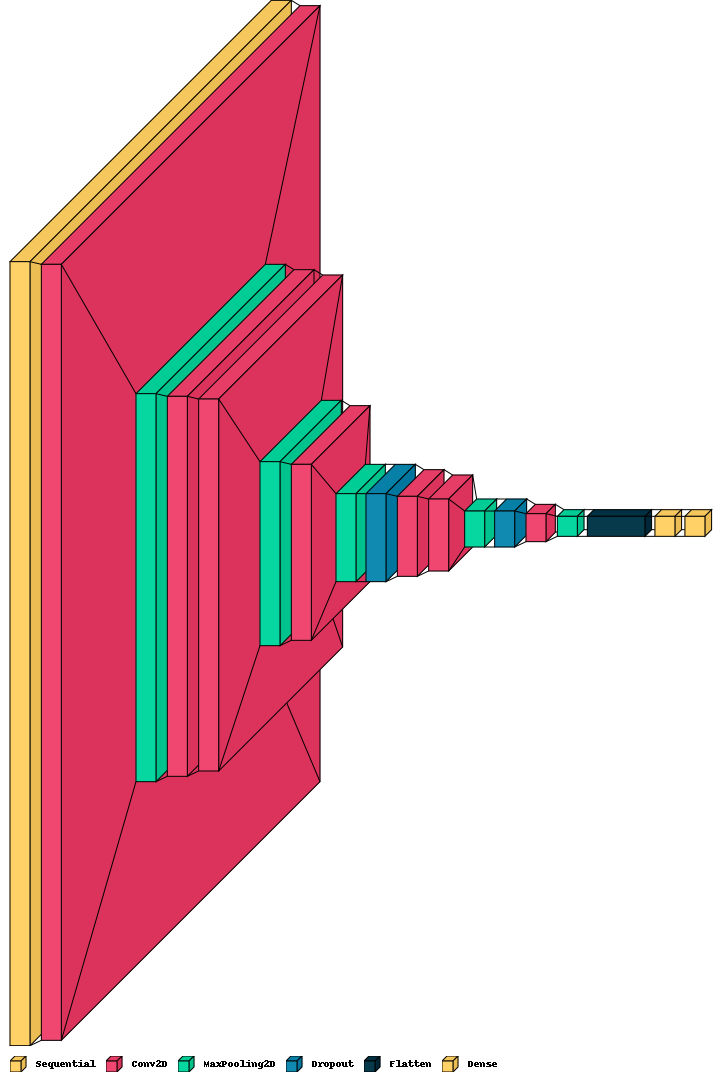

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [ ]:
model.compile(    optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy']
    )
history = model.fit(train_ds,
                       batch_size=batch_Size,
                       validation_data=val_ds,
                       verbose=1,
                       epochs=epochs)

Epoch 1/5
25/25 [==============================] - 205s 8s/step - loss: 0.4255 - accuracy: 0.7387 - val_loss: 0.3420 - val_accuracy: 0.7538
Epoch 2/5
25/25 [==============================] - 180s 7s/step - loss: 0.2832 - accuracy: 0.8788 - val_loss: 0.2417 - val_accuracy: 0.9598
Epoch 3/5
25/25 [==============================] - 181s 7s/step - loss: 0.2047 - accuracy: 0.9438 - val_loss: 0.1827 - val_accuracy: 0.9598
Epoch 4/5
25/25 [==============================] - 180s 7s/step - loss: 0.1668 - accuracy: 0.9463 - val_loss: 0.1133 - val_accuracy: 0.9548
Epoch 5/5
25/25 [==============================] - 180s 7s/step - loss: 0.1235 - accuracy: 0.9525 - val_loss: 0.1448 - val_accuracy: 0.9598


# **Visualized Evaluation**

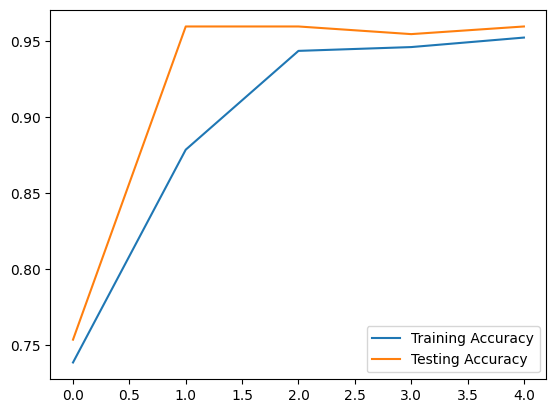

In [ ]:
plt.plot(history.history['accuracy'] ,label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

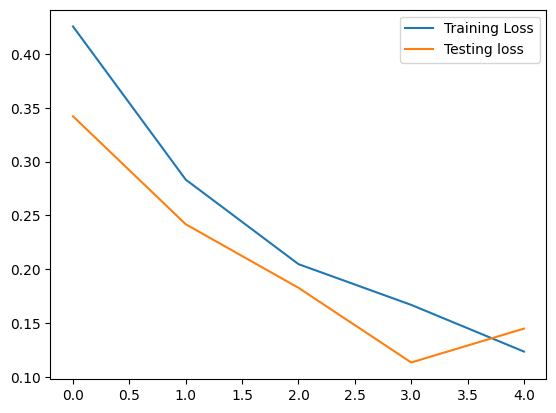

In [ ]:

plt.plot(history.history['loss'] ,label='Training Loss')
plt.plot(history.history['val_loss'],label='Testing loss')
plt.legend()

In [ ]:
def PredictIMG(data, classes, model):

    for imgs, lab in iter(data):
        label = np.array(lab)

        for i in range(len(imgs)):

            img = tf.expand_dims(imgs[i], axis=0)
            Tlab = classes[label[i]]

            pred = model.predict(img)[0]
            pred = 1 if pred>0.5 else 0
            predlab = classes[pred]
#             title = f"True : {lab}\nPred : {predlab}"
#             print("true: ",Tlab, "pred: ",predlab)




In [ ]:
PredictIMG(val_ds, labels, model)

1/1 [==============================] - 0s 58ms/step


In [ ]:
model.evaluate(val_ds)

7/7 [==============================] - 14s 2s/step - loss: 0.1448 - accuracy: 0.9598


[0.14477932453155518, 0.9597989916801453]

In [ ]:
X_val,y_val=[],[]
for images, labels in val_ds:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
y_pred=np.where(predictions>=.5,1,0)
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

7/7 [==============================] - 9s 1s/step


,Actual,Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
194,0,0
195,0,0
196,0,0
197,1,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Prediction'].plot(kind='hist', bins=20, title='Prediction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Actual', y='Prediction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Actual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Actual')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Prediction']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Prediction')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Prediction'].plot(kind='line', figsize=(8, 4), title='Prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

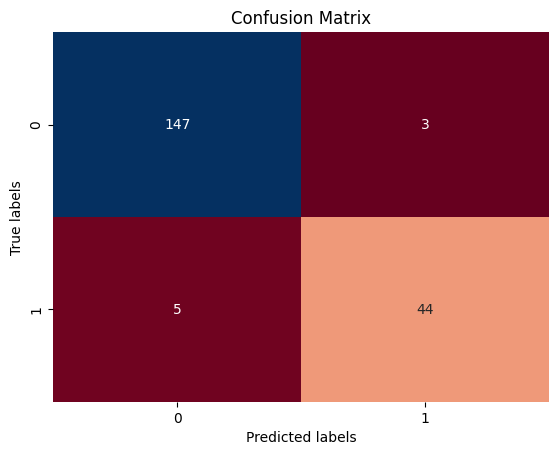

array([[147,   3],
       [  5,  44]])

In [ ]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [ ]:
ClassificationReport = classification_report(y_val,y_pred)
print( ClassificationReport )

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       150
           1       0.94      0.90      0.92        49

    accuracy                           0.96       199
   macro avg       0.95      0.94      0.95       199
weighted avg       0.96      0.96      0.96       199



In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
